### STEP 0: Import Dependencies

In [1]:
import time
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import matplotlib.pyplot as plt

### STEP 1: Read File as Pandas DataFrame

In [2]:
# Read Data then Display first 5 rows
data=pd.read_csv("biodeg.csv",header=None) #read CSV files
pd.set_option('display.max_columns', None) #format data frame to show all columns
data.head() #display first 5 rows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [3]:
# Check data to see 
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1055 non-null   float64
 1   1       1055 non-null   float64
 2   2       1055 non-null   int64  
 3   3       1055 non-null   int64  
 4   4       1055 non-null   int64  
 5   5       1055 non-null   int64  
 6   6       1055 non-null   int64  
 7   7       1055 non-null   float64
 8   8       1055 non-null   int64  
 9   9       1055 non-null   int64  
 10  10      1055 non-null   int64  
 11  11      1055 non-null   float64
 12  12      1055 non-null   float64
 13  13      1055 non-null   float64
 14  14      1055 non-null   float64
 15  15      1055 non-null   int64  
 16  16      1055 non-null   float64
 17  17      1055 non-null   float64
 18  18      1055 non-null   int64  
 19  19      1055 non-null   int64  
 20  20      1055 non-null   int64  
 21  21      1055 non-null   float64
 22  

**No missing values and all variables are numeric**

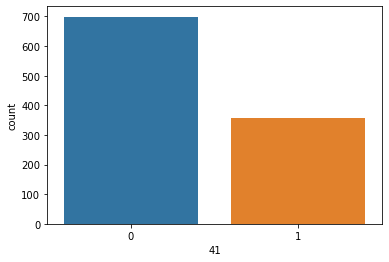

In [5]:
# Plot the number of 1's and 0's
sns.countplot(x=41,data=data);

**NB: There is a class imbalance**

In [6]:
# Count the no of 1's and 0's
print("No of 1's:{}".format(data.iloc[:,-1][data.iloc[:,-1]==1].count()))
print("No of 0's:{}".format(data.iloc[:,-1][data.iloc[:,-1]==0].count()))

No of 1's:356
No of 0's:699


**NB: Though there is a class, decision to resample will not be taken since the minority class still meets up to more than half of majority class**

In [7]:
# Split data into predictor and targets
y = data.iloc[:,-1]
X = data.drop(41,axis=1)
labels=list(X.columns)
number_features = len(labels)

In [8]:
# Split Data to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### STEP 2: Train a classifier.
#### A. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialise decision Tree Model
decision_model = DecisionTreeClassifier(random_state=15)

# Use Grid Search to get an array of Parameters 
params = {
    'max_depth': [2,3, 4, 5, 8,10,15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

decision = GridSearchCV(decision_model,
                        param_grid=params, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

# Train Decision Tree Model
start_time = time.time()
decision.fit(X_train, y_train) # fit model
decision_time = time.time() - start_time
print("Best Parameters:",decision.best_params_)
print('Accuracy_Train: {}\n Accuracy_Test: {}\n\n Report:\n  {}'.format(decision.score(X_train, y_train),
      decision.score(X_test, y_test),classification_report(y_test,decision.predict(X_test))))

Fitting 4 folds for each of 80 candidates, totalling 320 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
Accuracy_Train: 0.8794037940379403
 Accuracy_Test: 0.8454258675078864

 Report:
                precision    recall  f1-score   support

           0       0.91      0.87      0.89       224
           1       0.71      0.80      0.75        93

    accuracy                           0.85       317
   macro avg       0.81      0.83      0.82       317
weighted avg       0.85      0.85      0.85       317



#### B. Naive Bayes Classifier

In [10]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes= BernoulliNB()

start_time = time.time()
naive_bayes.fit(X_train, y_train) 
bayes_time = time.time() - start_time
print('Accuracy_Train: {}\n Accuracy_Test: {}\n\n Report:\n  {}'.format(naive_bayes.score(X_train, y_train),
      naive_bayes.score(X_test, y_test),classification_report(y_test,naive_bayes.predict(X_test))))

Accuracy_Train: 0.8035230352303523
 Accuracy_Test: 0.7602523659305994

 Report:
                precision    recall  f1-score   support

           0       0.89      0.76      0.82       224
           1       0.57      0.76      0.65        93

    accuracy                           0.76       317
   macro avg       0.73      0.76      0.73       317
weighted avg       0.79      0.76      0.77       317



#### C. Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier

#Initialise neural network
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=1000)

parameter_space={'activation':['tanh','relu'],
                 'solver':['lbfgs','sgd','adam'],
                 'alpha':[0.0001,0.05],
                 'learning_rate':['constant','adaptive','invscaling']
                }

# Use grid search to tune
mlp_clf=GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=5)

# Train model
start_time = time.time()
mlp_clf.fit(X_train, y_train)
mlp_time = time.time() - start_time

print("Best Parameters:",mlp_clf.best_params_)
print('Accuracy_Train: {}\n Accuracy_Test: {}\n\n Report:\n  {}'.format(mlp_clf.score(X_train, y_train),
      mlp_clf.score(X_test, y_test),classification_report(y_test,mlp_clf.predict(X_test))))

Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy_Train: 0.9132791327913279
 Accuracy_Test: 0.8485804416403786

 Report:
                precision    recall  f1-score   support

           0       0.87      0.93      0.90       224
           1       0.79      0.66      0.72        93

    accuracy                           0.85       317
   macro avg       0.83      0.79      0.81       317
weighted avg       0.84      0.85      0.84       317



#### D. Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
params={'n_estimators':[100, 200, 400, 800, 1200],
        'max_depth':[5, 10, 15, 25, 30]} 

forest=GridSearchCV(forest_model,params,n_jobs=-1,cv=5)

start_time = time.time()
forest.fit(X_train, y_train) # fit model
forest_time=time.time() - start_time

# 
print('Accuracy_Train: {}\n Accuracy_Test: {}\n\n Report:\n  {}'.format(forest.score(X_train, y_train),
      forest.score(X_test, y_test),classification_report(y_test,forest.predict(X_test))))

Accuracy_Train: 0.997289972899729
 Accuracy_Test: 0.8643533123028391

 Report:
                precision    recall  f1-score   support

           0       0.91      0.89      0.90       224
           1       0.76      0.80      0.77        93

    accuracy                           0.86       317
   macro avg       0.83      0.84      0.84       317
weighted avg       0.87      0.86      0.87       317



### STEP 3: Record your results.

In [13]:
results={'Accuracy (train)':[],'Accuracy (validation)':[],
         'Training Time':[decision_time,bayes_time,mlp_time,forest_time],
         'model':['Decision tree','Naive Bayes Classifier','Neural network','Random forest']}

ind=[decision,naive_bayes,mlp_clf,forest]

for i in  range(len(ind)):
  results['Accuracy (train)'].append(ind[i].score(X_train, y_train))
  results['Accuracy (validation)'].append(ind[i].score(X_test, y_test))




In [14]:
pd.DataFrame.from_dict(results).set_index('model')

,Accuracy (train),Accuracy (validation),Training Time
model,,,
Decision tree,0.879404,0.845426,4.121078
Naive Bayes Classifier,0.803523,0.760252,0.002692
Neural network,0.913279,0.848580,141.262120
Random forest,0.997290,0.864353,33.339999


### STEP 4: Make your method replicable.

In [15]:
print('Decision tree: {}\n\nNaive Bayes Classifier: {}\n\nNeural network: {}\n\nRandom forest:{} \n'
      .format(decision.best_params_,'BernoulliNB with default sklearn parameter',mlp_clf.best_params_,'Default Parameters'))

Decision tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

Naive Bayes Classifier: BernoulliNB with default sklearn parameter

Neural network: {'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}

Random forest:Default Parameters 

